In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def load_data():
    # Load MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print("Dataset loaded successfully!")
    print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
    return (X_train, y_train), (X_test, y_test)

In [4]:
def preprocess_data(X_train, X_test):
    # Normalize the data to range [0, 1]
    X_train = X_train.astype("float32") / 255.0
    X_test = X_test.astype("float32") / 255.0
    
    # Reshape to include channel dimension (grayscale)
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)
    
    print("Data pre-processing completed!")
    print(f"Train data shape: {X_train.shape}, Test data shape: {X_test.shape}")
    return X_train, X_test

In [5]:
def build_model():
    # Define a CNN model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print("\nCNN model built and compiled!")
    return model

In [6]:
def train_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
    print("\nModel training completed!")
    return model, history

In [7]:
def evaluate_model(model, X_test, y_test):
    # Predict the labels
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Display the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix of CNN Model")
    plt.show()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [8]:
def plot_training_history(history):
    # Plotting accuracy and loss
    plt.figure(figsize=(14, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.show()

Dataset loaded successfully!
Training samples: 60000, Test samples: 10000
Data pre-processing completed!
Train data shape: (60000, 28, 28, 1), Test data shape: (10000, 28, 28, 1)


c:\Program Files\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



CNN model built and compiled!
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.8949 - loss: 0.3524 - val_accuracy: 0.9863 - val_loss: 0.0449
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9838 - loss: 0.0509 - val_accuracy: 0.9863 - val_loss: 0.0400
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9903 - loss: 0.0298 - val_accuracy: 0.9895 - val_loss: 0.0314
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 0.9907 - val_loss: 0.0306
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9945 - loss: 0.0167 - val_accuracy: 0.9922 - val_loss: 0.0242

Model training completed!
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Confusion Matrix:
[[ 976    0    0    0    0    0    1    1    2    0]
 [   0 1133    0    0    1    0    1    0    0    0]
 [   2    1 1014    3    3    0    0    6    3    0]
 [   0    0    0 1004    0    3    0    0    3    0]
 [   0    0    0    0  97

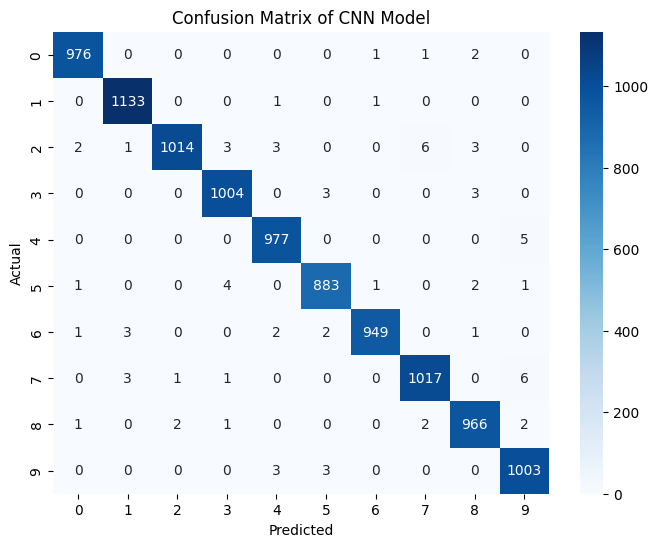


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



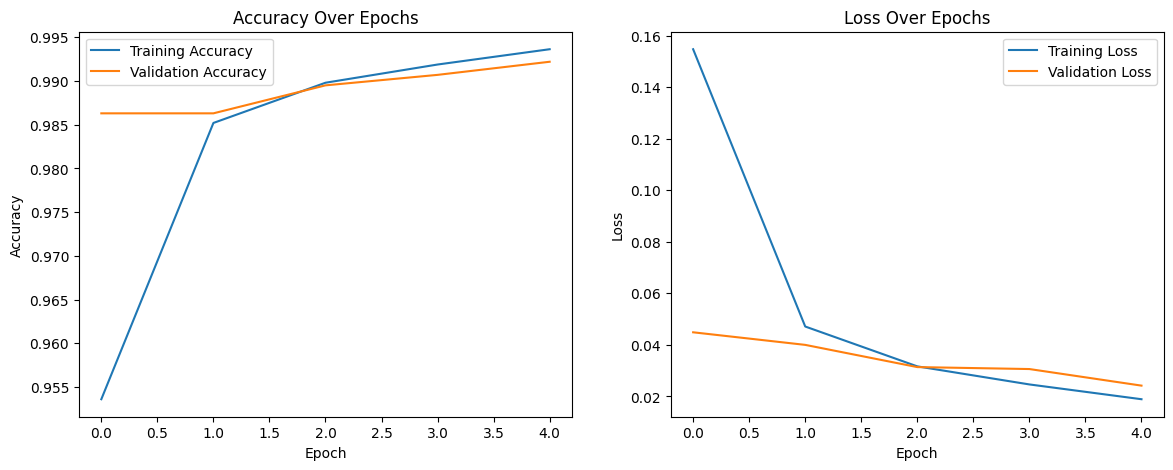

In [9]:
def main():
    # Step 1: Load the data
    (X_train, y_train), (X_test, y_test) = load_data()

    # Step 2: Data Preprocessing
    X_train, X_test = preprocess_data(X_train, X_test)

    # Step 3: Build the CNN Model
    model = build_model()

    # Step 4: Train the Model
    model, history = train_model(model, X_train, y_train, X_test, y_test)

    # Step 5: Evaluate the Model
    evaluate_model(model, X_test, y_test)

    # Step 6: Plot Training History
    plot_training_history(history)

if __name__ == "__main__":
    main()
